In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/liver/NFRP(random_same)_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00146.00146.2,1,ELISVVIAVK/2,0.178,0.007,[2],0,-0.005,28,0.069,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q86VP3|PACS2_HUMAN(pre=K,post=M)",54458485
1,Adult_Liver_bRP_Elite_82_f01.00187.00187.2,1,FYLEVSQILK/2,0.205,0.032,[2],0,0.507,72,0.069,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q06278|AOXA_HUMAN(pre=K,post=K)",75901618
2,Adult_Liver_bRP_Elite_82_f01.00337.00337.2,1,IVGGWDLLPR/2,0.190,0.011,[2],0,0.506,43,0.053,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96RQ9|OXLA_HUMAN(pre=R,post=A)",119810468
3,Adult_Liver_bRP_Elite_82_f01.00339.00339.2,1,LEVIIEESYDFK/2,0.207,0.020,[2],0,-0.010,87,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9UPR5|NAC2_HUMAN(pre=R,post=N)",145609705
4,Adult_Liver_bRP_Elite_82_f01.00350.00350.3,1,HGSGSGQSSSYGPYR/3,0.067,0.006,[2],0,0.331,6,0.041,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q86YZ3|HORN_HUMAN(pre=R,post=S)",98087028


In [3]:
NNd1 = pd.read_excel('./target_decoy/liver/NFRP(random_same)_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00135.00135.3,1,HEYELGETLGTSR/3,0.253,0.0594,[2],0,0.00267,58,0.0657,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WZ42|TITIN_HUMAN(pre=R,post=V)",522516539
1,Adult_Liver_bRP_Elite_82_f01.00156.00156.2,1,TGGSTVLVVRK/2,0.174,0.0460,[2],0,0.00000,43,0.0610,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9HAB8|PPCS_HUMAN(pre=R,post=V)",503381546
2,Adult_Liver_bRP_Elite_82_f01.00157.00157.2,1,EELEKHQAELNK/2,0.203,0.0280,[2],0,0.49400,82,0.0570,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q16181|SEPT7_HUMAN(pre=K,post=R)",467992608
3,Adult_Liver_bRP_Elite_82_f01.00171.00171.2,1,EFVSEQAQALMMK/2,0.208,0.0080,[2],0,-0.00500,49,0.0550,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IUC4|RHPN2_HUMAN(pre=K,post=I)",460213825
4,Adult_Liver_bRP_Elite_82_f01.00177.00177.2,1,ERIEPLLEK/2,0.143,0.0010,[2],0,0.00300,48,0.0670,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P49321|NASP_HUMAN(pre=K,post=I)",347002466


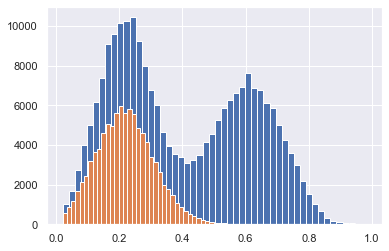

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.019260000000000003
0.013659999999999995


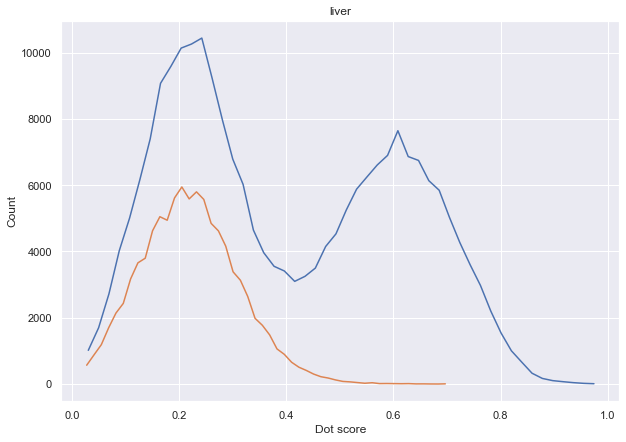

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('liver')
plt.plot(nnt1[1][:-1] + 0.0095, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0065, nnd1[0])
plt.show()

In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.45200000000000035
nnt:  96863
nnd:  961
FDR:  0.009921228952231503
"""

score:  0.001
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.002
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.003
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.004
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.005
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.006
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.007
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.008
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.009000000000000001
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.010000000000000002
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.011000000000000003
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.012000000000000004
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.013000000000000005
nnt:  227725
nnd:  95339
FDR:  0.41865846964540565


score:  0.014000000000000005
nnt:  227725
nnd:  95339


FDR:  0.3968691769828238


score:  0.10500000000000008
nnt:  216565
nnd:  85816
FDR:  0.3962597834368434


score:  0.10600000000000008
nnt:  216312
nnd:  85593
FDR:  0.39569233329634973


score:  0.10700000000000008
nnt:  216026
nnd:  85368
FDR:  0.3951746549026506


score:  0.10800000000000008
nnt:  215759
nnd:  85142
FDR:  0.394616215314309


score:  0.10900000000000008
nnt:  215484
nnd:  84919
FDR:  0.3940849436617104


score:  0.11000000000000008
nnt:  215229
nnd:  84703
FDR:  0.39354826719447655


score:  0.11100000000000008
nnt:  214989
nnd:  84472
FDR:  0.392913125787831


score:  0.11200000000000009
nnt:  214712
nnd:  84241
FDR:  0.3923441633443869


score:  0.11300000000000009
nnt:  214452
nnd:  84004
FDR:  0.3917146960625221


score:  0.11400000000000009
nnt:  214188
nnd:  83763
FDR:  0.3910723289820158


score:  0.11500000000000009
nnt:  213904
nnd:  83524
FDR:  0.3904742314309223


score:  0.11600000000000009
nnt:  213595
nnd:  83266
FDR:  0.3898312226409794


score:  0.117

nnt:  173638
nnd:  51338
FDR:  0.2956610880106889


score:  0.20900000000000016
nnt:  173101
nnd:  50949
FDR:  0.2943310552798655


score:  0.21000000000000016
nnt:  172577
nnd:  50502
FDR:  0.29263459209512277


score:  0.21100000000000016
nnt:  172015
nnd:  50071
FDR:  0.2910850797895532


score:  0.21200000000000016
nnt:  171455
nnd:  49641
FDR:  0.28952786445422996


score:  0.21300000000000016
nnt:  170909
nnd:  49196
FDR:  0.2878490892814305


score:  0.21400000000000016
nnt:  170380
nnd:  48764
FDR:  0.2862073013264468


score:  0.21500000000000016
nnt:  169836
nnd:  48323
FDR:  0.2845274264584658


score:  0.21600000000000016
nnt:  169283
nnd:  47889
FDR:  0.2828931434343673


score:  0.21700000000000016
nnt:  168733
nnd:  47449
FDR:  0.28120758832000853


score:  0.21800000000000017
nnt:  168187
nnd:  47046
FDR:  0.27972435443880916


score:  0.21900000000000017
nnt:  167615
nnd:  46624
FDR:  0.27816126241684813


score:  0.22000000000000017
nnt:  167085
nnd:  46218
FDR:  0.27

nnt:  125248
nnd:  14517
FDR:  0.11590604241185488


score:  0.3130000000000002
nnt:  124932
nnd:  14287
FDR:  0.1143582108667115


score:  0.3140000000000002
nnt:  124637
nnd:  14032
FDR:  0.11258294086025819


score:  0.3150000000000002
nnt:  124321
nnd:  13807
FDR:  0.11105927397623892


score:  0.3160000000000002
nnt:  124002
nnd:  13614
FDR:  0.10978855179755165


score:  0.3170000000000002
nnt:  123705
nnd:  13374
FDR:  0.10811204074208804


score:  0.3180000000000002
nnt:  123379
nnd:  13171
FDR:  0.1067523646649754


score:  0.31900000000000023
nnt:  123071
nnd:  12958
FDR:  0.10528881702431929


score:  0.32000000000000023
nnt:  122764
nnd:  12768
FDR:  0.10400443126649507


score:  0.32100000000000023
nnt:  122476
nnd:  12548
FDR:  0.10245272543192135


score:  0.32200000000000023
nnt:  122159
nnd:  12331
FDR:  0.10094221465467137


score:  0.32300000000000023
nnt:  121869
nnd:  12165
FDR:  0.09982029884548162


score:  0.32400000000000023
nnt:  121590
nnd:  11972
FDR:  0.098

nnt:  102707
nnd:  2011
FDR:  0.01957997020650978


score:  0.4190000000000003
nnt:  102527
nnd:  1968
FDR:  0.019194943770909127


score:  0.4200000000000003
nnt:  102366
nnd:  1944
FDR:  0.01899068049938456


score:  0.4210000000000003
nnt:  102193
nnd:  1899
FDR:  0.0185824860802599


score:  0.4220000000000003
nnt:  102025
nnd:  1854
FDR:  0.0181720166625827


score:  0.4230000000000003
nnt:  101875
nnd:  1816
FDR:  0.017825766871165643


score:  0.4240000000000003
nnt:  101728
nnd:  1780
FDR:  0.017497640767536963


score:  0.4250000000000003
nnt:  101552
nnd:  1740
FDR:  0.017134079092484638


score:  0.4260000000000003
nnt:  101388
nnd:  1701
FDR:  0.016777133388566696


score:  0.4270000000000003
nnt:  101250
nnd:  1659
FDR:  0.016385185185185187


score:  0.4280000000000003
nnt:  101074
nnd:  1613
FDR:  0.01595860458673843


score:  0.4290000000000003
nnt:  100917
nnd:  1585
FDR:  0.015705976198261938


score:  0.4300000000000003
nnt:  100744
nnd:  1553
FDR:  0.015415310092908

'\n결과\nscore:  0.001\nnnt:  371072\nnnd:  2261\nFDR:  0.006093157123145912\n'

In [9]:
print(len(NNt1))
print(len(NNd1))

227725
95339


In [10]:
NNt2 = pd.read_excel('./target_decoy/HEK/NFRP(random_same)_target.xlsx')
NNt2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,67,0.093,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q04695|K1C17_HUMAN(pre=R,post=R)",165241511
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0400,[2],0,0.334,21,0.069,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9H773|DCTP1_HUMAN(pre=R,post=S)",219973844
2,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,SDLHEVK/2,0.133,0.0000,[2],0,0.497,13,0.050,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q8IXI2|MIRO1_HUMAN(pre=K,post=Q)",222207536
3,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.2480,[2],0,-0.002,76,0.080,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",217882860
4,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.4090,[2],0,-0.003,13,0.118,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P12277|KCRB_HUMAN(pre=R,post=T)",97722630


In [11]:
NNd2 = pd.read_excel('./target_decoy/HEK/NFRP(random_same)_decoy.xlsx')
NNd2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.148,0.020,[2],0,-0.002,4,0.106,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9NSY1|BMP2K_HUMAN(pre=K,post=G)",552130236
1,b1906_293T_proteinID_01A_QE3_122212.01911.01911.3,1,GKDEPEMEAEETVEEDEELVAH/3,0.027,0.021,[2],0,0.003,1,0.039,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9H4B7|TBB1_HUMAN(pre=K,post=-)",316571375
2,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PDSPSPQSSSK/2,0.198,0.033,[2],0,0.503,41,0.057,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9H320|VCX1_HUMAN(pre=K,post=K)",521764163
3,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PMQHHGAVPGPRGR/4,0.090,0.008,[2],0,0.002,8,0.049,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O94979|SC31A_HUMAN(pre=K,post=V)",381020949
4,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,EERLNETDIHLK/3,0.342,0.150,[2],0,0.001,82,0.069,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q14BN4|SLMAP_HUMAN(pre=R,post=D)",436835830


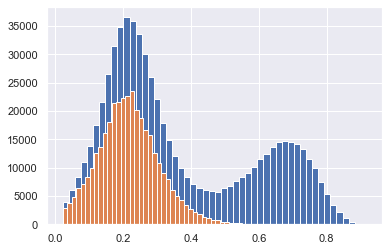

In [12]:
nnt2 = plt.hist(NNt2['Dot'], bins = 50)
nnd2 = plt.hist(NNd2['Dot'], bins = 50)

0.01796
0.013259999999999997


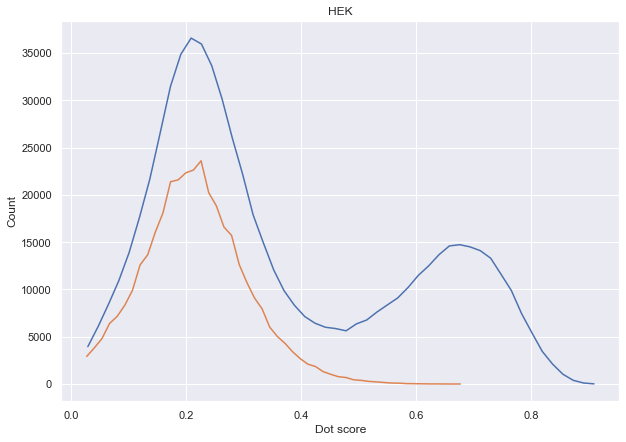

In [16]:
print(nnt2[1][1] - nnt2[1][0])
print(nnd2[1][1] - nnd2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('HEK')
plt.plot(nnt2[1][:-1] + 0.0085, nnt2[0])
plt.plot(nnd2[1][:-1] + 0.0065, nnd2[0])
plt.show()

In [14]:
print(len(NNt2))
print(len(NNd2))

652447
357985


In [15]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt2['Dot'] >= score
    nnt = NNt2[nntarget]
    
    nndecoy = NNd2['Dot'] >= score
    nnd = NNd2[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.48100000000000037
nnt:  200684
nnd:  1995
FDR:  0.009941001773933148
"""

score:  0.001
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.002
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.003
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.004
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.005
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.006
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.007
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.008
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.009000000000000001
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.010000000000000002
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.011000000000000003
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.012000000000000004
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.013000000000000005
nnt:  652447
nnd:  357985
FDR:  0.5486805824840945


score:  0.014000000000000005
nnt:  652447
nnd:  357985

nnt:  614183
nnd:  321709
FDR:  0.523799909798871


score:  0.10500000000000008
nnt:  613378
nnd:  320958
FDR:  0.5232629797612565


score:  0.10600000000000008
nnt:  612547
nnd:  320190
FDR:  0.5227190729854199


score:  0.10700000000000008
nnt:  611693
nnd:  319369
FDR:  0.5221066776961646


score:  0.10800000000000008
nnt:  610837
nnd:  318644
FDR:  0.5216514389272424


score:  0.10900000000000008
nnt:  609996
nnd:  317824
FDR:  0.5210263673860156


score:  0.11000000000000008
nnt:  609145
nnd:  317063
FDR:  0.5205049700810152


score:  0.11100000000000008
nnt:  608308
nnd:  316271
FDR:  0.5199191856756774


score:  0.11200000000000009
nnt:  607444
nnd:  315467
FDR:  0.5193351156649831


score:  0.11300000000000009
nnt:  606581
nnd:  314666
FDR:  0.518753472330983


score:  0.11400000000000009
nnt:  605651
nnd:  313823
FDR:  0.5181581471837742


score:  0.11500000000000009
nnt:  604742
nnd:  313017
FDR:  0.517604201461119


score:  0.11600000000000009
nnt:  603795
nnd:  312197
FDR: 

nnt:  464971
nnd:  189002
FDR:  0.4064812644229425


score:  0.20700000000000016
nnt:  462871
nnd:  187268
FDR:  0.4045792456213502


score:  0.20800000000000016
nnt:  460880
nnd:  185499
FDR:  0.40248871723659085


score:  0.20900000000000016
nnt:  458809
nnd:  183807
FDR:  0.4006176862267305


score:  0.21000000000000016
nnt:  456723
nnd:  182031
FDR:  0.3985588639065692


score:  0.21100000000000016
nnt:  454700
nnd:  180268
FDR:  0.3964548053661755


score:  0.21200000000000016
nnt:  452651
nnd:  178564
FDR:  0.39448493430921394


score:  0.21300000000000016
nnt:  450641
nnd:  176818
FDR:  0.39236997965120796


score:  0.21400000000000016
nnt:  448617
nnd:  175029
FDR:  0.39015240171460286


score:  0.21500000000000016
nnt:  446569
nnd:  173330
FDR:  0.38813710759143605


score:  0.21600000000000016
nnt:  444595
nnd:  171624
FDR:  0.38602323462926935


score:  0.21700000000000016
nnt:  442599
nnd:  169889
FDR:  0.3838440665252294


score:  0.21800000000000017
nnt:  440479
nnd:  168

nnt:  292714
nnd:  51168
FDR:  0.17480544148896193


score:  0.3090000000000002
nnt:  291615
nnd:  50376
FDR:  0.17274831541587368


score:  0.3100000000000002
nnt:  290550
nnd:  49583
FDR:  0.17065221132335226


score:  0.3110000000000002
nnt:  289411
nnd:  48816
FDR:  0.16867361641402712


score:  0.3120000000000002
nnt:  288402
nnd:  48046
FDR:  0.16659385163764467


score:  0.3130000000000002
nnt:  287320
nnd:  47326
FDR:  0.16471530001392176


score:  0.3140000000000002
nnt:  286295
nnd:  46551
FDR:  0.1625980195253148


score:  0.3150000000000002
nnt:  285271
nnd:  45815
FDR:  0.1606016734964297


score:  0.3160000000000002
nnt:  284317
nnd:  45102
FDR:  0.1586327936774797


score:  0.3170000000000002
nnt:  283312
nnd:  44377
FDR:  0.15663649968938836


score:  0.3180000000000002
nnt:  282372
nnd:  43686
FDR:  0.15471080702052611


score:  0.31900000000000023
nnt:  281411
nnd:  43003
FDR:  0.15281207912981368


score:  0.32000000000000023
nnt:  280442
nnd:  42279
FDR:  0.15075844

FDR:  0.03877548296983635


score:  0.4110000000000003
nnt:  224413
nnd:  8563
FDR:  0.0381573260016131


score:  0.4120000000000003
nnt:  224049
nnd:  8383
FDR:  0.037415922409829994


score:  0.4130000000000003
nnt:  223653
nnd:  8228
FDR:  0.03678913316611


score:  0.4140000000000003
nnt:  223267
nnd:  8057
FDR:  0.036086837732401116


score:  0.4150000000000003
nnt:  222910
nnd:  7900
FDR:  0.035440312233636896


score:  0.4160000000000003
nnt:  222570
nnd:  7743
FDR:  0.034789055128723545


score:  0.4170000000000003
nnt:  222227
nnd:  7592
FDR:  0.03416326548979197


score:  0.4180000000000003
nnt:  221878
nnd:  7461
FDR:  0.03362658758416787


score:  0.4190000000000003
nnt:  221481
nnd:  7298
FDR:  0.0329509077528095


score:  0.4200000000000003
nnt:  221100
nnd:  7155
FDR:  0.03236092265943012


score:  0.4210000000000003
nnt:  220737
nnd:  7010
FDR:  0.03175724957755156


score:  0.4220000000000003
nnt:  220383
nnd:  6876
FDR:  0.031200228692775757


score:  0.42300000000000

'\n결과\nscore:  0.5940000000000004\nnnt:  105367\nnnd:  1031\nFDR:  0.00978484724818966\n'

In [17]:
NNt3_1 = pd.read_excel('./target_decoy/lung/NFRP(random_same)_1_target.xlsx')
NNt3_1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00011.00011.2,1,YLNWIGVPTK/2,0.139,0.0381,[2],0,0.00804,33,0.0457,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|O60825|F262_HUMAN(pre=R,post=V)",290598338
1,01088_A01_P010740_S00_N01_R1.00107.00107.2,1,YLHPPTHLK/2,0.321,0.0830,[2],0,-0.00700,67,0.0720,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q5VZF2|MBNL2_HUMAN(pre=K,post=T)",290371879
2,01088_A01_P010740_S00_N01_R1.00178.00178.2,1,LSYSTSQEFSSR/2,0.123,0.0270,[2],0,0.49400,43,0.0440,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q5VUB5|F1711_HUMAN(pre=K,post=E)",165457667
3,01088_A01_P010740_S00_N01_R1.00185.00185.2,1,DLEINAEEEPEK/2,0.152,0.0060,[2],0,-0.00500,31,0.0590,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q12955|ANK3_HUMAN(pre=R,post=K)",32499481
4,01088_A01_P010740_S00_N01_R1.00189.00189.2,1,IPILSTFLTAR/2,0.160,0.0430,[2],0,0.50700,19,0.0760,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9UBB6|NCDN_HUMAN(pre=K,post=G)",115380794


In [18]:
NNt3_2 = pd.read_excel('./target_decoy/lung/NFRP(random_same)_2_target.xlsx')
NNt3_2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_F01_P010740_S00_N06_R1.19129.19129.3,1,FHGHVYLSK/3,0.354,0.025,[2],0,0.005,59,0.096,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q92540|SMG7_HUMAN(pre=K,post=S)",68637637
1,01088_F01_P010740_S00_N06_R1.19135.19135.2,1,GYGAVHVPFSPGR/2,0.466,0.342,[2],0,0.503,57,0.062,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9UPM9|B9D1_HUMAN(pre=R,post=H)",94902003
2,01088_F01_P010740_S00_N06_R1.19137.19137.2,1,ASQAALFEK/2,0.307,0.128,[2],0,0.001,73,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96A19|C102A_HUMAN(pre=R,post=N)",19826636
3,01088_F01_P010740_S00_N06_R1.19138.19138.3,1,IYISGMAPRPSLAK/3,0.495,0.274,[2],0,0.001,68,0.084,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P04004|VTNC_HUMAN(pre=R,post=K)",120778409
4,01088_F01_P010740_S00_N06_R1.19144.19144.3,1,LATLLGLQAPPTR/3,0.262,0.070,[2],0,0.328,23,0.083,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q14152|EIF3A_HUMAN(pre=R,post=I)",141727321


In [19]:
NNt3_3 = pd.read_excel('./target_decoy/lung/NFRP(random_same)_3_target.xlsx')
NNt3_3.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01279_C03_P013163_B00_N19_R1.35880.35880.3,1,ENNIFYSPISITSALGMVLLGAK/3,0.156,0.060,[2],0,0.007,12,0.053,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P48594|SPB4_HUMAN(pre=K,post=D)",57081131
1,01279_C03_P013163_B00_N19_R1.35884.35884.3,1,EVTVDTTLAGYHLPK/3,0.275,0.043,[2],0,0.328,87,0.071,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P51589|CP2J2_HUMAN(pre=R,post=G)",64228444
2,01279_C03_P013163_B00_N19_R1.35885.35885.2,1,QYGFFSYLR/2,0.458,0.159,[2],0,0.503,144,0.075,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q8IY18|SMC5_HUMAN(pre=K,post=E)",209083494
3,01279_C03_P013163_B00_N19_R1.35886.35886.3,1,ENYVWNVLLHR/3,0.605,0.340,[2],0,0.335,92,0.081,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q92538|GBF1_HUMAN(pre=R,post=G)",57472230
4,01279_C03_P013163_B00_N19_R1.35887.35887.3,1,ELRETVGDLEAMNEMNDELQENAR/3,0.134,0.011,[2],0,0.339,6,0.082,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q14203|DCTN1_HUMAN(pre=R,post=E)",55432214


In [20]:
NNd3_1 = pd.read_excel('./target_decoy/lung/NFRP(random_same)_1_decoy.xlsx')
NNd3_1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00038.00038.2,1,HVSGAPISGAIVK/2,0.177,0.039,[2],0,0.509,11,0.076,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q702N8|XIRP1_HUMAN(pre=R,post=F)",550023284
1,01088_A01_P010740_S00_N01_R1.00056.00056.2,1,DAVDRDGPDLYR/2,0.161,0.010,[2],0,0.493,38,0.046,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q03395|ROM1_HUMAN(pre=R,post=I)",570525162
2,01088_A01_P010740_S00_N01_R1.00092.00092.2,1,QNGWPDAEVDQR/2,0.159,0.020,[2],0,0.505,28,0.065,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y4U1|MMAC_HUMAN(pre=R,post=I)",482462826
3,01088_A01_P010740_S00_N01_R1.00106.00106.2,1,GPIPLLSGKIK/2,0.143,0.084,[2],0,0.007,3,0.075,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y548|YIPF1_HUMAN(pre=R,post=N)",401655809
4,01088_A01_P010740_S00_N01_R1.00111.00111.2,1,TQLDNPALFPK/2,0.178,0.031,[2],0,0.506,84,0.057,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WXF7|ATLA1_HUMAN(pre=K,post=H)",476082730


In [21]:
NNd3_2 = pd.read_excel('./target_decoy/lung/NFRP(random_same)_2_decoy.xlsx')
NNd3_2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_F01_P010740_S00_N06_R1.19128.19128.3,1,VSPEHSLVTQQLSK/3,0.312,0.000,[2],0,0.336,62,0.081,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8NF91|SYNE1_HUMAN(pre=K,post=S)",514795214
1,01088_F01_P010740_S00_N06_R1.19130.19130.2,1,TQESVLTWLR/2,0.189,0.021,[2],0,0.504,74,0.068,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P46776|RL27A_HUMAN(pre=K,post=V)",455615888
2,01088_F01_P010740_S00_N06_R1.19132.19132.3,1,SGLGPRVVLHTLMMK/3,0.256,0.125,[2],0,0.342,20,0.063,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q12873|CHD3_HUMAN(pre=K,post=A)",460232554
3,01088_F01_P010740_S00_N06_R1.19133.19133.3,1,LNPIQFIEISGDENGLAMIK/3,0.213,0.083,[2],0,0.342,17,0.067,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8TEQ6|GEMI5_HUMAN(pre=K,post=L)",403685885
4,01088_F01_P010740_S00_N06_R1.19134.19134.2,1,VEYSADVPVIDK/2,0.274,0.048,[2],0,0.002,73,0.065,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O43252|PAPS1_HUMAN(pre=R,post=E)",324495455


In [22]:
NNd3_3 = pd.read_excel('./target_decoy/lung/NFRP(random_same)_3_decoy.xlsx')
NNd3_3.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01279_C03_P013163_B00_N19_R1.35881.35881.4,1,TAGVAGIEHISIAPSVNSDTPRVSK/4,0.155,0.062,[2],0,-0.009,7,0.069,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P46020|KPB1_HUMAN(pre=R,post=T)",524390311
1,01279_C03_P013163_B00_N19_R1.35882.35882.2,1,FTYNISSEEMPFSASLNK/2,0.186,0.048,[2],0,0.498,19,0.059,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P0DJD0|RGPD1_HUMAN(pre=K,post=T)",468946558
2,01279_C03_P013163_B00_N19_R1.35883.35883.2,1,PKMLQGMMSLIDQGGQPK/2,0.176,0.038,[2],0,0.492,30,0.068,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y265|RUVB1_HUMAN(pre=R,post=K)",478666316
3,01279_C03_P013163_B00_N19_R1.35888.35888.3,1,LAEKEVEGELVEWTVEKNK/3,0.185,0.028,[2],0,0.005,31,0.075,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P05455|LA_HUMAN(pre=R,post=K)",467416039
4,01279_C03_P013163_B00_N19_R1.35889.35889.3,1,GMTESLTTPRGLVESYFQDWK/3,0.213,0.063,[2],0,-0.002,19,0.062,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P16662|UD2B7_HUMAN(pre=K,post=A)",563882730


In [23]:
NNt3 = list(NNt3_1['Dot']) + list(NNt3_2['Dot']) + list(NNt3_3['Dot'])
NNt3

[0.139,
 0.321,
 0.123,
 0.152,
 0.16,
 0.068,
 0.153,
 0.137,
 0.114,
 0.182,
 0.067,
 0.163,
 0.158,
 0.147,
 0.22,
 0.264,
 0.124,
 0.208,
 0.202,
 0.233,
 0.034,
 0.195,
 0.022,
 0.146,
 0.205,
 0.376,
 0.29,
 0.187,
 0.026,
 0.114,
 0.194,
 0.191,
 0.254,
 0.195,
 0.065,
 0.185,
 0.271,
 0.03,
 0.239,
 0.178,
 0.186,
 0.062,
 0.281,
 0.198,
 0.16,
 0.195,
 0.189,
 0.126,
 0.227,
 0.228,
 0.123,
 0.071,
 0.186,
 0.131,
 0.171,
 0.214,
 0.185,
 0.133,
 0.066,
 0.088,
 0.315,
 0.313,
 0.2,
 0.287,
 0.228,
 0.217,
 0.256,
 0.152,
 0.195,
 0.128,
 0.127,
 0.304,
 0.132,
 0.207,
 0.136,
 0.283,
 0.285,
 0.169,
 0.163,
 0.205,
 0.165,
 0.241,
 0.075,
 0.201,
 0.338,
 0.138,
 0.048,
 0.346,
 0.099,
 0.113,
 0.299,
 0.028,
 0.22,
 0.022,
 0.128,
 0.145,
 0.155,
 0.238,
 0.209,
 0.243,
 0.194,
 0.222,
 0.176,
 0.063,
 0.19,
 0.347,
 0.14,
 0.199,
 0.176,
 0.194,
 0.239,
 0.103,
 0.205,
 0.199,
 0.206,
 0.165,
 0.279,
 0.179,
 0.147,
 0.166,
 0.097,
 0.26,
 0.167,
 0.12,
 0.354,
 0.153,
 0.3

In [24]:
NNd3 = list(NNd3_1['Dot']) + list(NNd3_2['Dot']) + list(NNd3_3['Dot'])
NNd3

[0.177,
 0.161,
 0.159,
 0.143,
 0.178,
 0.208,
 0.155,
 0.255,
 0.208,
 0.03,
 0.261,
 0.229,
 0.249,
 0.139,
 0.321,
 0.077,
 0.319,
 0.145,
 0.304,
 0.168,
 0.237,
 0.346,
 0.096,
 0.259,
 0.213,
 0.173,
 0.19,
 0.062,
 0.276,
 0.124,
 0.069,
 0.256,
 0.122,
 0.198,
 0.118,
 0.193,
 0.195,
 0.144,
 0.303,
 0.195,
 0.032,
 0.138,
 0.202,
 0.313,
 0.085,
 0.241,
 0.191,
 0.236,
 0.295,
 0.208,
 0.115,
 0.073,
 0.195,
 0.083,
 0.084,
 0.299,
 0.358,
 0.243,
 0.245,
 0.135,
 0.18,
 0.244,
 0.156,
 0.278,
 0.216,
 0.059,
 0.25,
 0.205,
 0.307,
 0.204,
 0.236,
 0.273,
 0.06,
 0.112,
 0.144,
 0.152,
 0.263,
 0.239,
 0.2,
 0.344,
 0.247,
 0.279,
 0.065,
 0.163,
 0.224,
 0.201,
 0.154,
 0.065,
 0.237,
 0.2,
 0.099,
 0.208,
 0.153,
 0.247,
 0.126,
 0.2,
 0.153,
 0.195,
 0.267,
 0.118,
 0.14,
 0.132,
 0.148,
 0.268,
 0.205,
 0.255,
 0.157,
 0.397,
 0.094,
 0.163,
 0.183,
 0.228,
 0.228,
 0.229,
 0.199,
 0.169,
 0.125,
 0.272,
 0.238,
 0.102,
 0.141,
 0.201,
 0.212,
 0.309,
 0.253,
 0.304,
 0.2

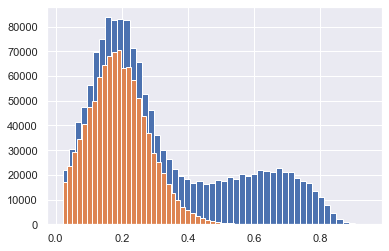

In [25]:
nnt3 = plt.hist(NNt3, bins = 50)
nnd3 = plt.hist(NNd3, bins = 50)

0.018400000000000003
0.014839999999999996


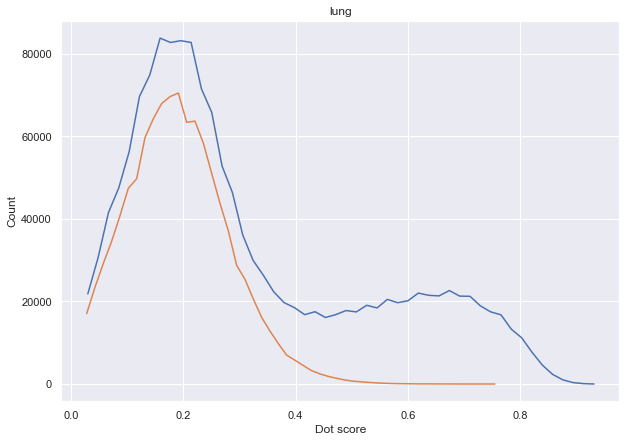

In [30]:
print(nnt3[1][1] - nnt3[1][0])
print(nnd3[1][1] - nnd3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('lung')
plt.plot(nnt3[1][:-1] + 0.009, nnt3[0])
plt.plot(nnd3[1][:-1] + 0.007, nnd3[0])
plt.show()

In [27]:
print(len(NNt3))
print(len(NNd3))

1488685
1034937


In [28]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ', score)
    
    nnt = 0
    nnd = 0
    
    for j in NNt3:
        if j >= score:
            nnt += 1
    print('nnt: ', nnt)
    
    for k in NNd3:
        if k >= score:
            nnd += 1
    print('nnd: ', nnd)
    
    print('FDR: ', nnd / nnt)
    print("\n")
    
    if (nnd / nnt) <= 0.01:
        print(nnt)
        print(nnd)
        print(nnd / nnt)
        print(score)
        break
"""
결과
score:  0.47700000000000037
nnt:  359824
nnd:  3563
FDR:  0.00990206323091289
"""

score:  0.001
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.002
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.003
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.004
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.005
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.006
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.007
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.008
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.009000000000000001
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.010000000000000002
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.011000000000000003
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.012000000000000004
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.013000000000000005
nnt:  1488685
nnd:  1034937
FDR:  0.6952021414872858


score:  0.014000000000000005

nnd:  871414
FDR:  0.6570367170105235


score:  0.10200000000000008
nnt:  1323167
nnd:  868364
FDR:  0.656276947656645


score:  0.10300000000000008
nnt:  1320017
nnd:  865259
FDR:  0.6554908004972663


score:  0.10400000000000008
nnt:  1316920
nnd:  862099
FDR:  0.65463277951584


score:  0.10500000000000008
nnt:  1313713
nnd:  858858
FDR:  0.6537637977244649


score:  0.10600000000000008
nnt:  1310518
nnd:  855553
FDR:  0.6528357489176035


score:  0.10700000000000008
nnt:  1307344
nnd:  852255
FDR:  0.6518980467267987


score:  0.10800000000000008
nnt:  1304060
nnd:  849008
FDR:  0.6510497983221631


score:  0.10900000000000008
nnt:  1300734
nnd:  845687
FDR:  0.6501613704262362


score:  0.11000000000000008
nnt:  1297437
nnd:  842322
FDR:  0.6492199621253286


score:  0.11100000000000008
nnt:  1294153
nnd:  838969
FDR:  0.6482765175369527


score:  0.11200000000000009
nnt:  1290805
nnd:  835525
FDR:  0.6472898695000406


score:  0.11300000000000009
nnt:  1287411
nnd:  832178
FDR:  

nnt:  905616
nnd:  446589
FDR:  0.4931328510096995


score:  0.20300000000000015
nnt:  901049
nnd:  441996
FDR:  0.49053492096434265


score:  0.20400000000000015
nnt:  896466
nnd:  437436
FDR:  0.48795604071989346


score:  0.20500000000000015
nnt:  892026
nnd:  432877
FDR:  0.4852739718349017


score:  0.20600000000000016
nnt:  887496
nnd:  428379
FDR:  0.48268273885178076


score:  0.20700000000000016
nnt:  882972
nnd:  423943
FDR:  0.4801318728113689


score:  0.20800000000000016
nnt:  878522
nnd:  419376
FDR:  0.4773653932400099


score:  0.20900000000000016
nnt:  874088
nnd:  414819
FDR:  0.47457349832053525


score:  0.21000000000000016
nnt:  869648
nnd:  410251
FDR:  0.47174373999595237


score:  0.21100000000000016
nnt:  865245
nnd:  405899
FDR:  0.46911452825500294


score:  0.21200000000000016
nnt:  860877
nnd:  401480
FDR:  0.46636162889704336


score:  0.21300000000000016
nnt:  856465
nnd:  397027
FDR:  0.46356476913826017


score:  0.21400000000000016
nnt:  852133
nnd:  3

nnt:  562415
nnd:  110484
FDR:  0.19644568512575233


score:  0.3050000000000002
nnt:  560385
nnd:  108721
FDR:  0.19401126011581324


score:  0.3060000000000002
nnt:  558418
nnd:  106904
FDR:  0.19144082031739665


score:  0.3070000000000002
nnt:  556320
nnd:  105184
FDR:  0.18907103825136612


score:  0.3080000000000002
nnt:  554399
nnd:  103353
FDR:  0.18642349643487813


score:  0.3090000000000002
nnt:  552414
nnd:  101616
FDR:  0.18394899477565738


score:  0.3100000000000002
nnt:  550513
nnd:  99910
FDR:  0.1814852691943696


score:  0.3110000000000002
nnt:  548539
nnd:  98286
FDR:  0.1791777795197789


score:  0.3120000000000002
nnt:  546618
nnd:  96661
FDR:  0.17683464503547267


score:  0.3130000000000002
nnt:  544755
nnd:  95039
FDR:  0.17446191407146333


score:  0.3140000000000002
nnt:  542960
nnd:  93460
FDR:  0.17213054368645941


score:  0.3150000000000002
nnt:  541073
nnd:  91886
FDR:  0.16982181701914528


score:  0.3160000000000002
nnt:  539261
nnd:  90360
FDR:  0.167

nnt:  424218
nnd:  16328
FDR:  0.03848964447524622


score:  0.4080000000000003
nnt:  423217
nnd:  15997
FDR:  0.037798576144153


score:  0.4090000000000003
nnt:  422254
nnd:  15701
FDR:  0.03718378037863466


score:  0.4100000000000003
nnt:  421325
nnd:  15372
FDR:  0.03648489883106865


score:  0.4110000000000003
nnt:  420405
nnd:  15046
FDR:  0.03578929841462399


score:  0.4120000000000003
nnt:  419448
nnd:  14753
FDR:  0.035172417081497584


score:  0.4130000000000003
nnt:  418502
nnd:  14432
FDR:  0.03448490090847833


score:  0.4140000000000003
nnt:  417568
nnd:  14129
FDR:  0.03383640508851253


score:  0.4150000000000003
nnt:  416623
nnd:  13830
FDR:  0.03319547888618727


score:  0.4160000000000003
nnt:  415648
nnd:  13559
FDR:  0.03262135268303949


score:  0.4170000000000003
nnt:  414770
nnd:  13281
FDR:  0.03202015574896931


score:  0.4180000000000003
nnt:  413784
nnd:  12997
FDR:  0.03141010768903583


score:  0.4190000000000003
nnt:  412892
nnd:  12735
FDR:  0.03084341

'\n결과\nscore:  0.5850000000000004\nnnt:  464943\nnnd:  4605\nFDR:  0.009904439899084403\n'